<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-и-анализ-данных" data-toc-modified-id="Выгрузка-и-анализ-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выгрузка и анализ данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

**Заказчик** — Сервис-агрегатор такси «Чётенькое такси».

**Цель исследования** 

* Построение модели для предсказания количества заказов на следующий час

**Входные данные**  — ```/datasets/taxi.csv``` - база данных пользователей


**Результаты исследования** — Получена модель подходящая под требования заказчика (RMSE <= 48)

## Подготовка

### Выгрузка и анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error

In [2]:
# выгрузим данные и посмотрим в каком виде получается датафрейм
df = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


**Описание таблицы:**


* `datetime` — Время заказов
* `num_orders` — Число заказов

In [3]:
# изучим датафрейм
# функция для обработки данных датафрейма
def research(df):
    print('Информация по таблице:', '\n')
    df.info()
    print()
    print('Количество пропусков:', '\n')
    print(df.isna().sum(), '\n', '\n')
    print('Процент пропусков:', '\n')
    print(df.isna().mean()*100, '\n')

    display(df.describe(include='all'))
    print()
    print('Число явных дубликатов:', df.duplicated().sum(), '\n')
    print('Провека на монотонность:', df.index.is_monotonic)


In [4]:
research(df)

Информация по таблице: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB

Количество пропусков: 

num_orders    0
dtype: int64 
 

Процент пропусков: 

num_orders    0.0
dtype: float64 



,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000



Число явных дубликатов: 26415 

Провека на монотонность: True


In [5]:
# Так как прогноз на час, сделаем группировку по часу
df = df.resample('1H').sum()

df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


**Промежуточный итог:**

Данные просмотренны, пропусков или иных проблем с названием, временные ряды подготовлены к работе. 

## Анализ

<AxesSubplot:xlabel='datetime'>

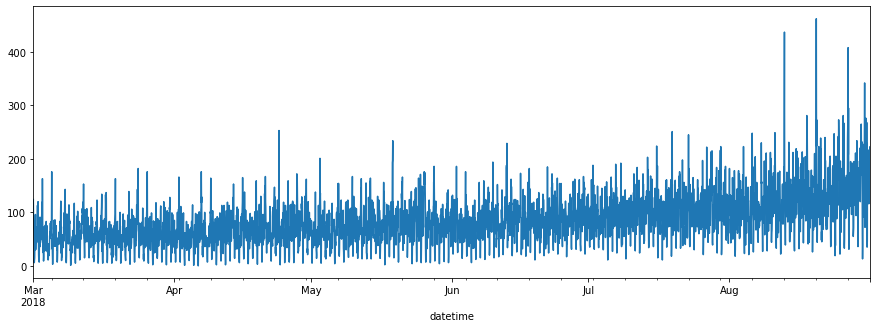

In [6]:
#Глянем что получается
plt.figure(figsize=(15,5))
df['num_orders'].plot()


<AxesSubplot:xlabel='datetime'>

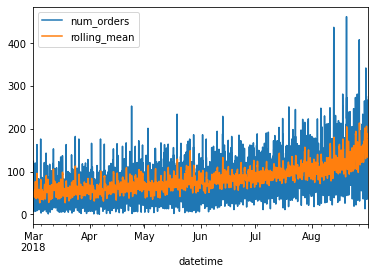

In [7]:
# Можно заметить, что количество заказов растет, а так же имеются всплески
#потому сделаем столбец со скользящим среднем

df['rolling_mean']=df['num_orders'].rolling(window=10).mean()

df.plot()

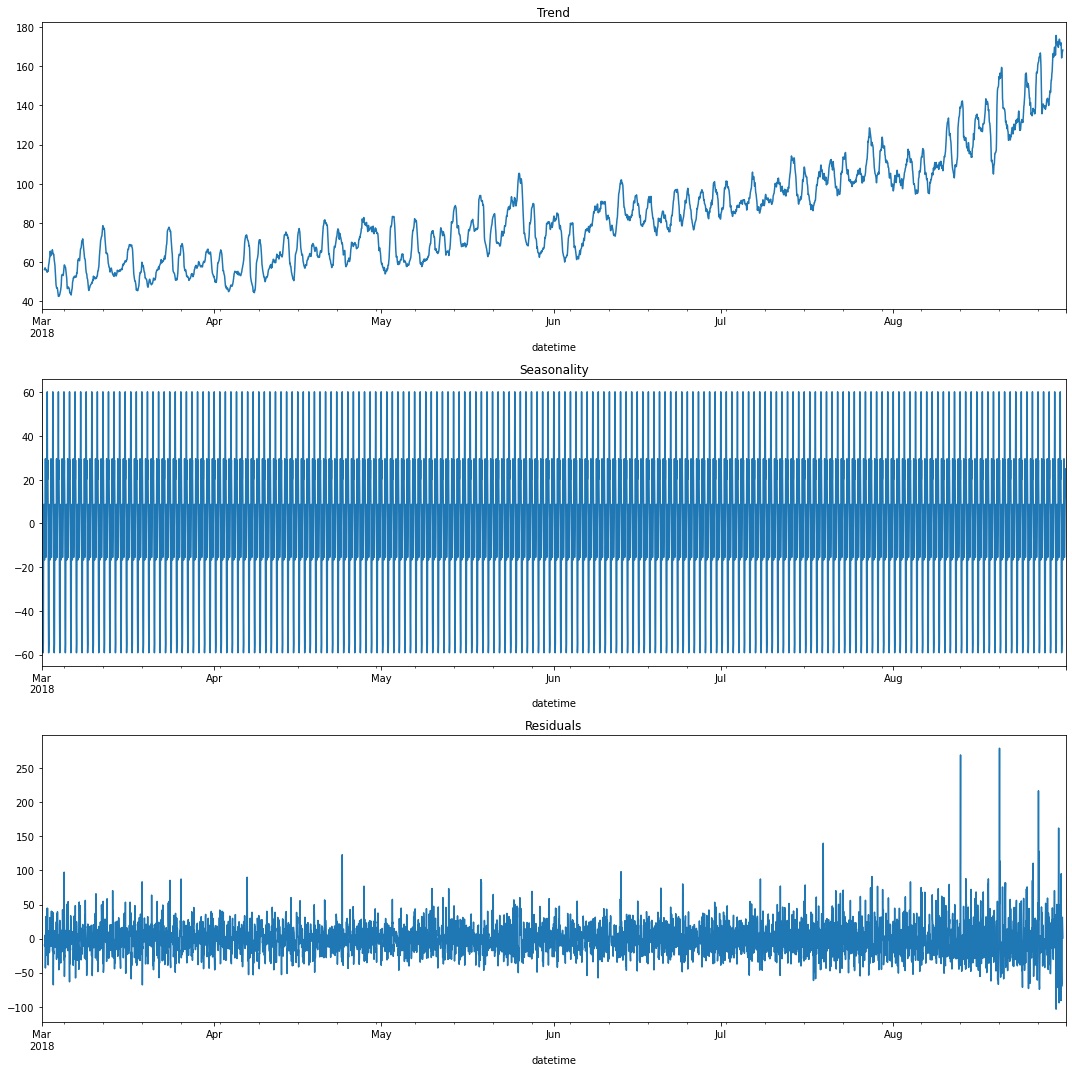

In [8]:
# Посмотрим на Тренд, сезонность и шум в целом

decomposed = seasonal_decompose(df['num_orders']) 

plt.figure(figsize=(15, 15))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

С мая можно заметить стабильный рост числа заказов. По сеезоннсоти ничего не ясно слишком шумно. 

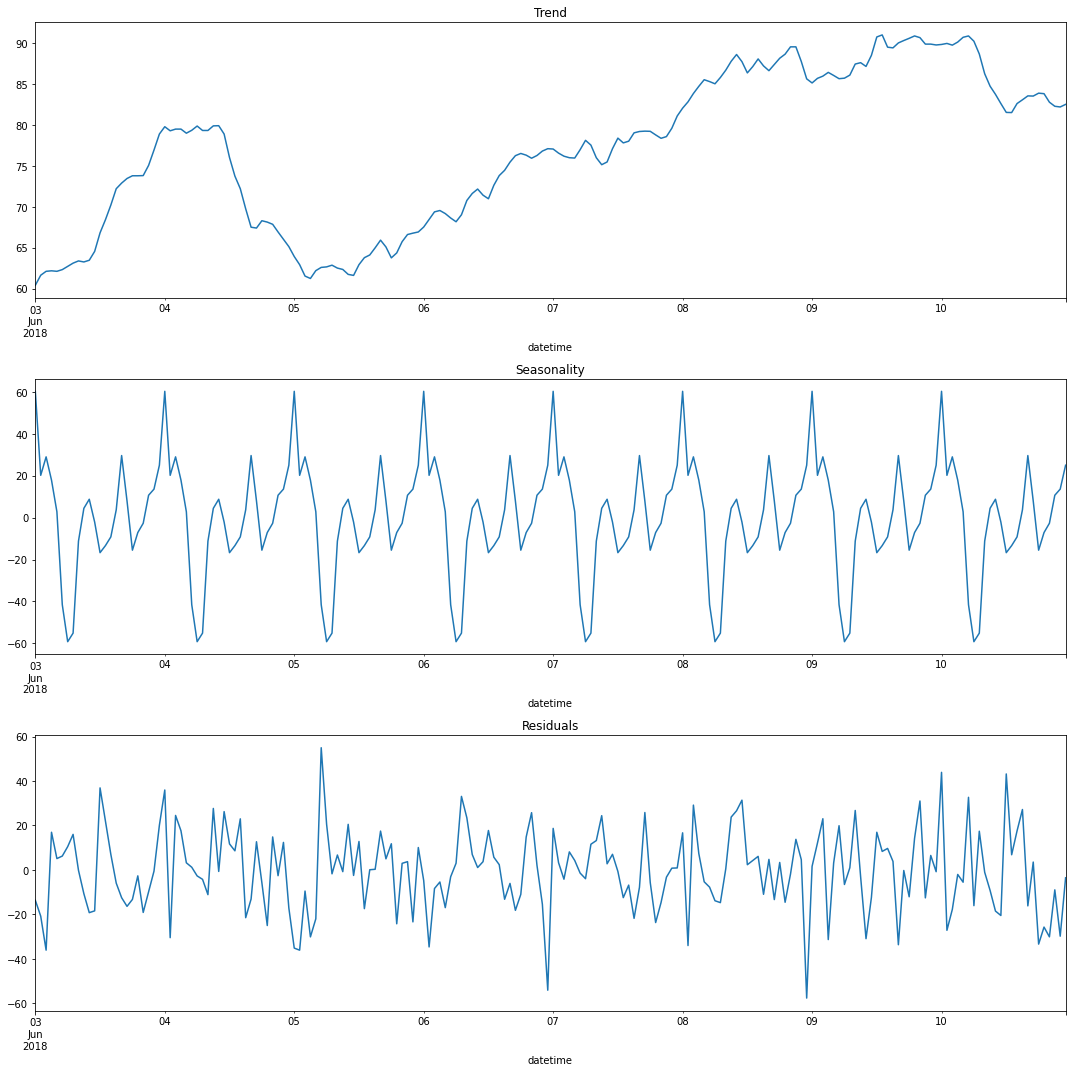

In [9]:
# Посмотрим на Тренд, сезонность и шум на недельном промежутке с 
plt.figure(figsize=(15, 15))

plt.subplot(311)
decomposed.trend['2018-06-03':'2018-06-10'].plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal['2018-06-03':'2018-06-10'].plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid['2018-06-03':'2018-06-10'].plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

Можно заметить, явную сезонность в течении дня. К ночи количество заказов увеличивается, с утра падает и постепенно расет. Можно посмотреть на внутри одного дня как будут выглядеть графики. 

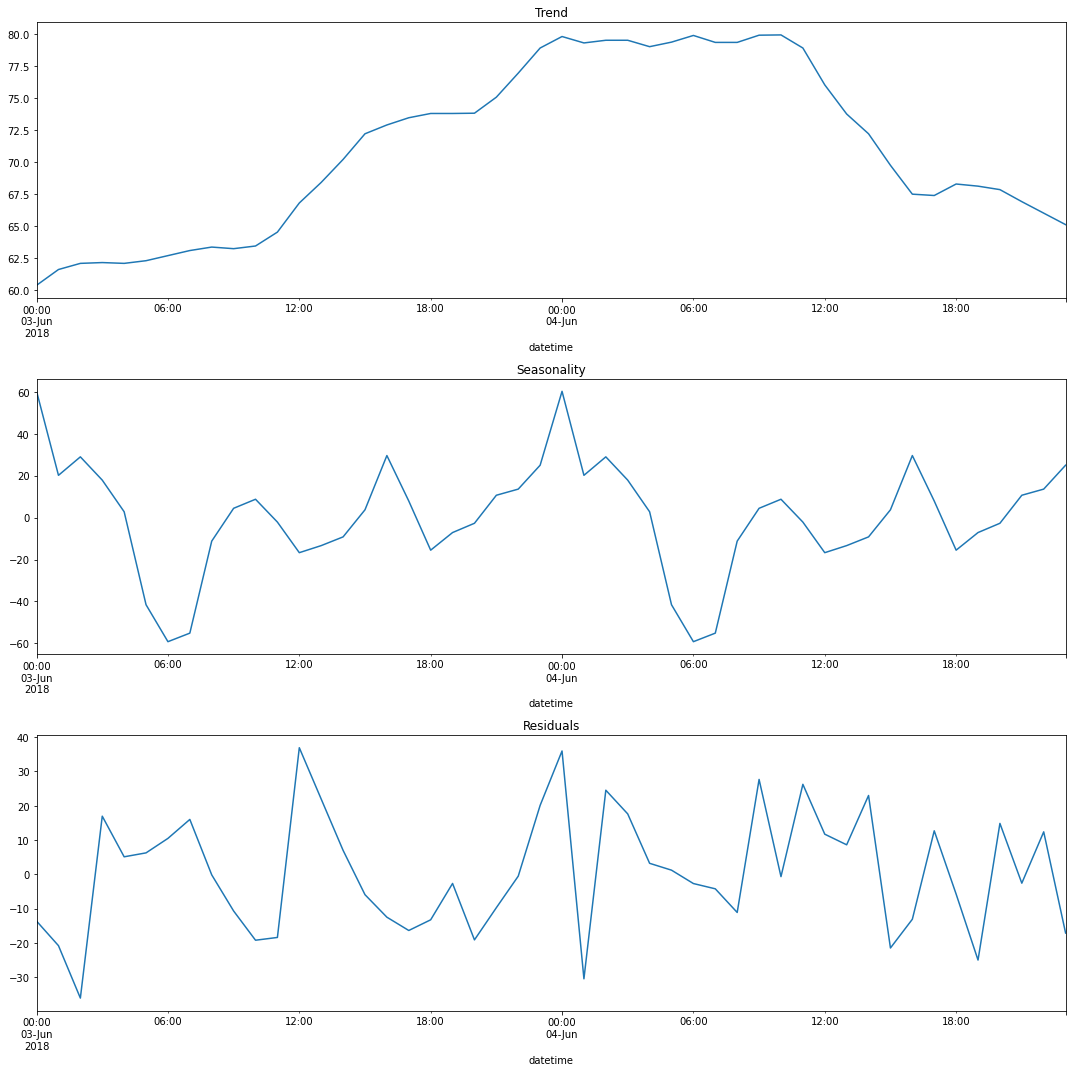

In [10]:
plt.figure(figsize=(15, 15))

plt.subplot(311)
decomposed.trend['2018-06-03':'2018-06-04'].plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal['2018-06-03':'2018-06-04'].plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid['2018-06-03':'2018-06-04'].plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

Выгрузили по часам, можно заметить, что наибольшее количество заказов в 0 часов, наименьшее в 6. Так же есть небольшие всплески в районе 10 часов и 16 - немного странно, так как не рабочий час пик. Возможно кто любит подольше поспать добирается с комфортом куда либо)

In [11]:
from statsmodels.tsa.stattools import adfuller

ts = df['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный')
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')

Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный
Наш ряд стационарный


## Обучение

In [12]:
# напишем функцию для создания признаков

def make_features(df, max_lag, rolling_mean_size):
    
    #df['Month']=df.index.month
    df['Day']=df.index.day
    df['Day_of_week']=df.index.dayofweek
    df['Hour']=df.index.hour
    
    
    for i in range(1,max_lag+1):
        df['lag_{}'.format(i)]=df['num_orders'].shift(i)
    df['rolling_mean']=df['num_orders'].shift().rolling(window=rolling_mean_size).mean()
    

In [13]:
df_copy = df.copy()
df_copy.head(10)


,num_orders,rolling_mean
datetime,,
2018-03-01 00:00:00,124,NaN
2018-03-01 01:00:00,85,NaN
2018-03-01 02:00:00,71,NaN
2018-03-01 03:00:00,66,NaN
2018-03-01 04:00:00,43,NaN
2018-03-01 05:00:00,6,NaN
2018-03-01 06:00:00,12,NaN
2018-03-01 07:00:00,15,NaN
2018-03-01 08:00:00,34,NaN


In [14]:
#Посмотрим, что получается
make_features(df_copy, 6, 7)
df_copy.head(10)

,num_orders,rolling_mean,Day,Day_of_week,Hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
datetime,,,,,,,,,,,
2018-03-01 00:00:00,124,NaN,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,NaN,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,NaN,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,NaN,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN
2018-03-01 04:00:00,43,NaN,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN
2018-03-01 05:00:00,6,NaN,1,3,5,43.0,66.0,71.0,85.0,124.0,NaN
2018-03-01 06:00:00,12,NaN,1,3,6,6.0,43.0,66.0,71.0,85.0,124.0
2018-03-01 07:00:00,15,58.142857,1,3,7,12.0,6.0,43.0,66.0,71.0,85.0
2018-03-01 08:00:00,34,42.571429,1,3,8,15.0,12.0,6.0,43.0,66.0,71.0


In [15]:
# разделим вначале на 2 выборки (обучающая и валидационная) разммером 10% согласно заданию
df_train, df_valid = train_test_split(df_copy, shuffle=False, test_size=0.1, random_state=12345)


# добавим тестовую выборку равную валидационной
df_test_size = df_valid.shape[0] / df_train.shape[0]
df_train, df_test = train_test_split(df_train, test_size=df_test_size, shuffle=False, random_state=12345)
print()
print('Кол-во строк в обучающей выборке:', df_train.shape[0])
print('Кол-во строк в валидационной выборке:', df_valid.shape[0])
print('Кол-во строк в тестовой выборке:', df_test.shape[0])


Кол-во строк в обучающей выборке: 3532
Кол-во строк в валидационной выборке: 442
Кол-во строк в тестовой выборке: 442


In [16]:
df_train = df_train.dropna()
df_valid = df_valid.dropna()
df_test = df_test.dropna()

In [17]:
# разделение на обучающие признаки и целевые
features_train = df_train.drop(['num_orders'], axis=1)
target_train = df_train['num_orders']

features_valid = df_valid.drop(['num_orders'], axis=1)
target_valid = df_valid['num_orders']

features_test = df_test.drop(['num_orders'], axis=1)
target_test = df_test['num_orders']

In [18]:
# создадим табличку в которую будем записывать результаты
result_test = {}

### LinearRegression

In [19]:
%%time

lr_model = LinearRegression().fit(features_train, target_train)

predictions = lr_model.predict(features_train)
mse = mean_squared_error(target_train, predictions)
rmse_train = mse ** 0.5
rmse_train

predictions_valid = lr_model.predict(features_valid)
mse_valid = mean_squared_error(target_valid, predictions_valid)
rmse_valid = mse_valid ** 0.5
    
predictions_test = lr_model.predict(features_test)
mse_test = mean_squared_error(target_test, predictions_test)
rmse_test = mse_valid ** 0.5

print("RMSE обучающей выборки:", rmse_train)
print("RMSE валидационной выборки: ", rmse_valid)
print("RMSE тестовой выборки: ", rmse_test)

print('\n', 'Время обработки:')

RMSE обучающей выборки: 29.657660872887238
RMSE валидационной выборки:  55.42240276782633
RMSE тестовой выборки:  55.42240276782633

 Время обработки:
CPU times: total: 31.2 ms
Wall time: 11 ms


In [20]:
#запишем результаты
result_test['LinearRegression'] = [rmse_train, rmse_valid, rmse_test]

### DecisionTreeRegressor

In [21]:
%%time

for depth in np.arange(1, 20):
    dtr = (DecisionTreeRegressor(max_depth=depth, random_state=12345)
        .fit(features_train, target_train)
       )
    predictions = dtr.predict(features_train)
    mse = mean_squared_error(target_train, predictions)
    rmse = mse ** 0.5
    
    predictions_valid = dtr.predict(features_valid)
    mse_valid = mean_squared_error(target_valid, predictions_valid)
    rmse_valid = mse_valid ** 0.5
    
    print("max_depth =", depth, ":")
    print("RMSE обучающей  выборки", rmse)
    print("RMSE валидационной выборки", rmse_valid)
    print()
    
print('\n', 'Время обработки:')

max_depth = 1 :
RMSE обучающей  выборки 31.869565852689988
RMSE валидационной выборки 79.1725872122151

max_depth = 2 :
RMSE обучающей  выборки 29.076428608579793
RMSE валидационной выборки 78.07192265075167

max_depth = 3 :
RMSE обучающей  выборки 26.536118934217626
RMSE валидационной выборки 71.19703314675353

max_depth = 4 :
RMSE обучающей  выборки 25.676486354787876
RMSE валидационной выборки 69.88053602834745

max_depth = 5 :
RMSE обучающей  выборки 23.898833041169222
RMSE валидационной выборки 66.3561377103894

max_depth = 6 :
RMSE обучающей  выборки 22.349738593344714
RMSE валидационной выборки 64.55238740805906

max_depth = 7 :
RMSE обучающей  выборки 20.596567180641117
RMSE валидационной выборки 60.635365352989275

max_depth = 8 :
RMSE обучающей  выборки 19.001694027258104
RMSE валидационной выборки 59.39445057196629

max_depth = 9 :
RMSE обучающей  выборки 17.245282649183626
RMSE валидационной выборки 59.493040906278615

max_depth = 10 :
RMSE обучающей  выборки 15.26289919987

Лучший результат:

* max_depth = 11 :
* RMSE обучающей  выборки 13.121677703984933
* RMSE валидационной выборки 59.26955748720753

### RandomForestRegressor

In [22]:
%%time

for estim in np.arange(1, 50, 2):
    rfr = (RandomForestRegressor(max_depth=8, 
                                     n_estimators=estim,
                                     random_state=12345)
        .fit(features_train, target_train)
       )
    predictions = rfr.predict(features_train)
    mse = mean_squared_error(target_train, predictions)
    rmse = mse ** 0.5
    
    predictions_valid = rfr.predict(features_valid)
    mse_valid = mean_squared_error(target_valid, predictions_valid)
    rmse_valid = mse_valid ** 0.5
    
    print("n_estimators =", estim, ":")
    print("RMSE обучающей  выборки", rmse)
    print("RMSE валидационной выборки", rmse_valid)
    print()
    
print('\n', 'Время обработки:')

n_estimators = 1 :
RMSE обучающей  выборки 22.660132954074545
RMSE валидационной выборки 60.56270387061465

n_estimators = 3 :
RMSE обучающей  выборки 19.81737806779815
RMSE валидационной выборки 57.194276104819544

n_estimators = 5 :
RMSE обучающей  выборки 19.4394832442676
RMSE валидационной выборки 56.19154855081235

n_estimators = 7 :
RMSE обучающей  выборки 19.13963636983124
RMSE валидационной выборки 56.84495896806727

n_estimators = 9 :
RMSE обучающей  выборки 18.990219916777683
RMSE валидационной выборки 58.40460195521234

n_estimators = 11 :
RMSE обучающей  выборки 18.84130141528334
RMSE валидационной выборки 57.71681739715981

n_estimators = 13 :
RMSE обучающей  выборки 18.82008207591315
RMSE валидационной выборки 58.52993958857738

n_estimators = 15 :
RMSE обучающей  выборки 18.813754127194702
RMSE валидационной выборки 58.52271980367807

n_estimators = 17 :
RMSE обучающей  выборки 18.766066689937745
RMSE валидационной выборки 59.420332167267006

n_estimators = 19 :
RMSE обу

Лучший результат:
* n_estimators = 19 :
* RMSE обучающей  выборки 18.745991750040663
* RMSE валидационной выборки 58.957138589314496

### CatBoostRegressor

In [23]:
%%time
# 
cbr = CatBoostRegressor(iterations=300,  
                        random_state=12345,  
                        loss_function='RMSE')
cbr.fit(features_train, target_train,  verbose=30)

predictions = cbr.predict(features_train)
mse = mean_squared_error(target_train, predictions)
rmse = mse ** 0.5
rmse

predictions_valid = cbr.predict(features_valid)
mse_valid = mean_squared_error(target_valid, predictions_valid)
rmse_valid = mse_valid ** 0.5

predictions_test = cbr.predict(features_test)
mse_test = mean_squared_error(target_test, predictions_test)
rmse_test = mse_test ** 0.5
rmse_test
 
print()
print("RMSE обучающей выборки:", rmse_train)
print("RMSE валидационной выборки: ", rmse_valid)
print("RMSE тестовой выборки: ", rmse_test)
print('\n', 'Время обработки:')

Learning rate set to 0.132963
0:	learn: 33.7482441	total: 136ms	remaining: 40.5s
30:	learn: 22.2924698	total: 204ms	remaining: 1.77s
60:	learn: 20.6069383	total: 269ms	remaining: 1.05s
90:	learn: 19.5642469	total: 331ms	remaining: 760ms
120:	learn: 18.7671364	total: 398ms	remaining: 590ms
150:	learn: 17.7740148	total: 463ms	remaining: 457ms
180:	learn: 16.9455837	total: 529ms	remaining: 348ms
210:	learn: 16.2443220	total: 601ms	remaining: 254ms
240:	learn: 15.5846632	total: 677ms	remaining: 166ms
270:	learn: 15.0503946	total: 747ms	remaining: 79.9ms
299:	learn: 14.5342439	total: 823ms	remaining: 0us

RMSE обучающей выборки: 29.657660872887238
RMSE валидационной выборки:  57.99689778834702
RMSE тестовой выборки:  35.0843537821463

 Время обработки:
CPU times: total: 2.52 s
Wall time: 1.72 s


In [24]:
result_test['CatBoostRegressor'] = [rmse_train, rmse_valid, rmse_test]

## Тестирование

Протестируем древесные модели с учетом лучших результатов обучения

### DecisionTreeRegressor

In [25]:
%%time
dtr = (DecisionTreeRegressor(max_depth=11, random_state=12345)
        .fit(features_train, target_train)
       )

predictions = dtr.predict(features_train)
mse = mean_squared_error(target_train, predictions)
rmse = mse ** 0.5
    
predictions_valid = dtr.predict(features_valid)
mse_valid = mean_squared_error(target_valid, predictions_valid)
rmse_valid = mse_valid ** 0.5

predictions_test = dtr.predict(features_test)
mse_test = mean_squared_error(target_test, predictions_test)
rmse_test = mse_test ** 0.5

print("RMSE обучающей  выборки", rmse)
print("RMSE валидационной выборки", rmse_valid)
print("RMSE тестовой выборки", rmse_test)
print()

print('\n', 'Время обработки:')


RMSE обучающей  выборки 13.121677703984933
RMSE валидационной выборки 59.26955748720753
RMSE тестовой выборки 38.85697646171896


 Время обработки:
CPU times: total: 31.2 ms
Wall time: 29 ms


In [26]:
result_test['DecisionTreeRegressor'] = [rmse, rmse_valid, rmse_test]

### RandomForestRegressor

In [27]:
%%time
rfr = (RandomForestRegressor(max_depth=8,
                                 n_estimators=19,
                                 random_state=12345
                                )
           .fit(features_train, target_train)
          )
predictions = rfr.predict(features_train)
mse = mean_squared_error(target_train, predictions)
rmse_train = mse ** 0.5
    
predictions_valid = rfr.predict(features_valid)
mse_valid = mean_squared_error(target_valid, predictions_valid)
rmse_valid = mse_valid ** 0.5

predictions_test = rfr.predict(features_test)
mse_test = mean_squared_error(target_test, predictions_test)
rmse_test = mse_test ** 0.5
rmse_test

print("RMSE обучающей  выборки", rmse_train)
print("RMSE валидационной выборки", rmse_valid)
print("RMSE тестовой выборки", rmse_test)
print()

print('\n', 'Время обработки:')

RMSE обучающей  выборки 18.745991750040663
RMSE валидационной выборки 58.957138589314496
RMSE тестовой выборки 34.839174880622075


 Время обработки:
CPU times: total: 234 ms
Wall time: 227 ms


In [28]:
result_test['RandomForestRegressor'] = [rmse_train, rmse_valid, rmse_test]

In [29]:
df_result_test = pd.DataFrame.from_dict(data=result_test, 
                                        columns=['RMSE train', 'RMSE valid', 'RMSE test'], orient='index')
df_result_test

,RMSE train,RMSE valid,RMSE test
LinearRegression,29.657661,55.422403,55.422403
CatBoostRegressor,29.657661,57.996898,35.084354
DecisionTreeRegressor,13.121678,59.269557,38.856976
RandomForestRegressor,18.745992,58.957139,34.839175


## Вывод

3 модели показали результат RMSE на тестовой выборке менее 48 пунктов. Наиболее интересная модель - ```RandomForestRegressor```

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48